# K-Means Clustering with Separated Clusters
This notebook demonstrates unsupervised machine learning using the K-Means clustering algorithm. We'll generate clearly separable synthetic data, apply the elbow method to determine optimal clusters, and visualize the clustering result.

## Step 1: Import Required Libraries

In [1]:
from sklearn.cluster import KMeans  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


## Step 2: Define K-Means Clustering and Elbow Method Functions

In [2]:
def KMeans_Algorithm(data, K):
    df = pd.DataFrame(data, columns=["X", "Y"])
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        max_iter=300,
        random_state=2021
    )
    kmeans.fit(df)
    df["labels"] = kmeans.labels_
    return df, kmeans.cluster_centers_

def Elbow_Method(data):
    inertia = []
    df = pd.DataFrame(data, columns=["X", "Y"])
    for k in range(1, 10):
        model = KMeans(n_clusters=k, random_state=2022)
        model.fit(df)
        inertia.append(model.inertia_)
    return inertia


## Step 3: Generate Clearly Separable Synthetic Data

In [3]:
cluster_centers = [(2, 2), (8, 3), (3, 8), (8, 8)]
data = []

for center in cluster_centers:
    x = np.random.normal(loc=center[0], scale=0.5, size=75)
    y = np.random.normal(loc=center[1], scale=0.5, size=75)
    points = np.column_stack((x, y))
    data.append(points)

data = np.vstack(data)


## Step 4: Determine Optimal Number of Clusters using the Elbow Method

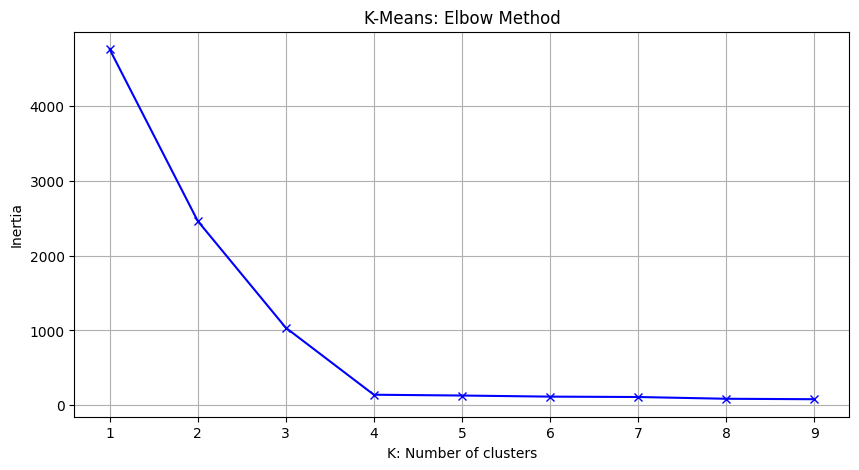

In [4]:
inertia = Elbow_Method(data)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel("K: Number of clusters")
plt.ylabel("Inertia")
plt.title("K-Means: Elbow Method")
plt.grid(True)
plt.show()


## Step 5: Apply K-Means Clustering with K=4

In [5]:
Clustered_df, centroids = KMeans_Algorithm(data, K=4)


## Step 6: Visualize the Clustered Data

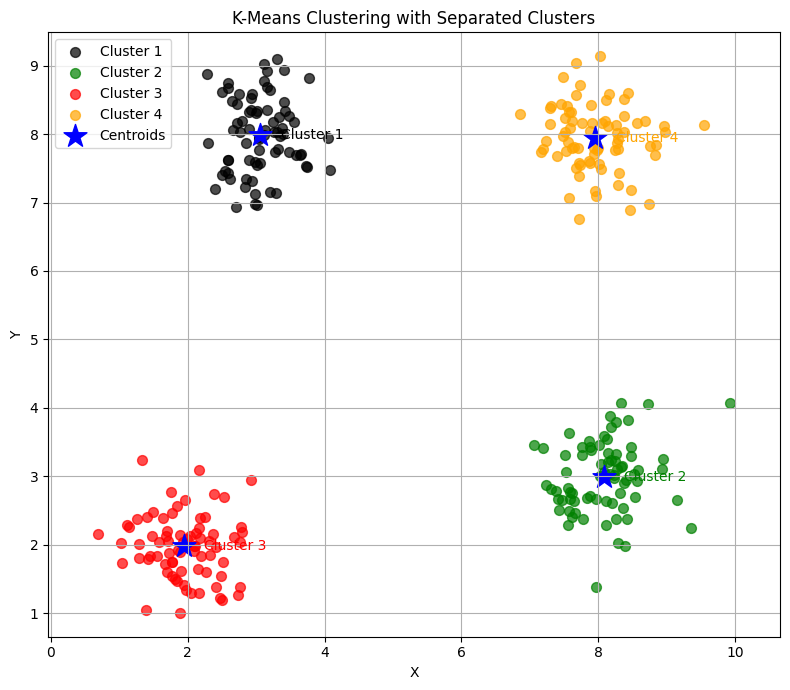

In [6]:
fig, ax = plt.subplots(figsize=(8, 7))
colors = ['black', 'green', 'red', 'orange']

for label in range(4):
    cluster = Clustered_df[Clustered_df["labels"] == label]
    plt.scatter(cluster["X"], cluster["Y"], 
                c=colors[label], 
                label=f'Cluster {label + 1}', 
                alpha=0.7, s=50)

# Plot centroids and add horizontal labels
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='*', s=300, c='blue', label='Centroids')

for idx, (x, y) in enumerate(centroids):
    plt.annotate(f'Cluster {idx + 1}', 
                 (x + 0.3, y), 
                 fontsize=10, 
                 color=colors[idx], 
                 ha='left', 
                 va='center')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering with Separated Clusters")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
